In [1]:
import pandas as pd

ModelData= pd.read_csv("C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/ANN Model/ModelData.csv")
ModelData

,Earthquake Magnitude,Hypocenter Depth (km),Joyner-Boore Dist. (km),Vs30 (m/s) selected for analysis,PGA (g),PGV (cm/sec),log10(Joyner-Boore Dist. (km)),log10(Vs30 (m/s) selected for analysis),PSA
0,6.0,6.000,2.07,593.35,0.157020,10.054000,0.315970,2.773311,0.161930
1,6.0,6.000,2.09,551.82,0.046423,0.649780,0.320146,2.741797,0.047520
2,5.8,10.000,71.28,219.31,0.040961,2.790700,1.852968,2.341058,0.040997
3,5.0,16.000,32.44,213.44,0.018449,0.645510,1.511081,2.329276,0.018463
4,5.5,10.000,52.73,219.31,0.122180,6.563900,1.722058,2.341058,0.122490
...,...,...,...,...,...,...,...,...,...
15178,4.4,6.957,114.10,760.00,0.000216,0.016257,2.057286,2.880814,0.000219
15179,4.4,6.957,169.06,760.00,0.000145,0.013679,2.228041,2.880814,0.000147
15180,4.4,6.957,136.18,664.57,0.000697,0.061963,2.134113,2.822541,0.000706
15181,4.4,6.957,144.13,760.00,0.000325,0.022603,2.158754,2.880814,0.000329


In [14]:
from csv import writer


ParamStats = pd.DataFrame({"Parameters": [x for x in ModelData.columns]})
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"Minimum": [ModelData[x].min() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"Maximum": [ModelData[x].max() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"Mean": [ModelData[x].mean() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"Median": [ModelData[x].median() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"STD": [ModelData[x].std() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"Sample_Skewness": [ModelData[x].skew() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats = pd.concat([ParamStats, pd.DataFrame(
    {"Kurtosis": [ModelData[x].kurtosis() for x in ModelData.columns]})], axis=1, join="inner")
ParamStats.to_csv("Stats_Week3.csv")

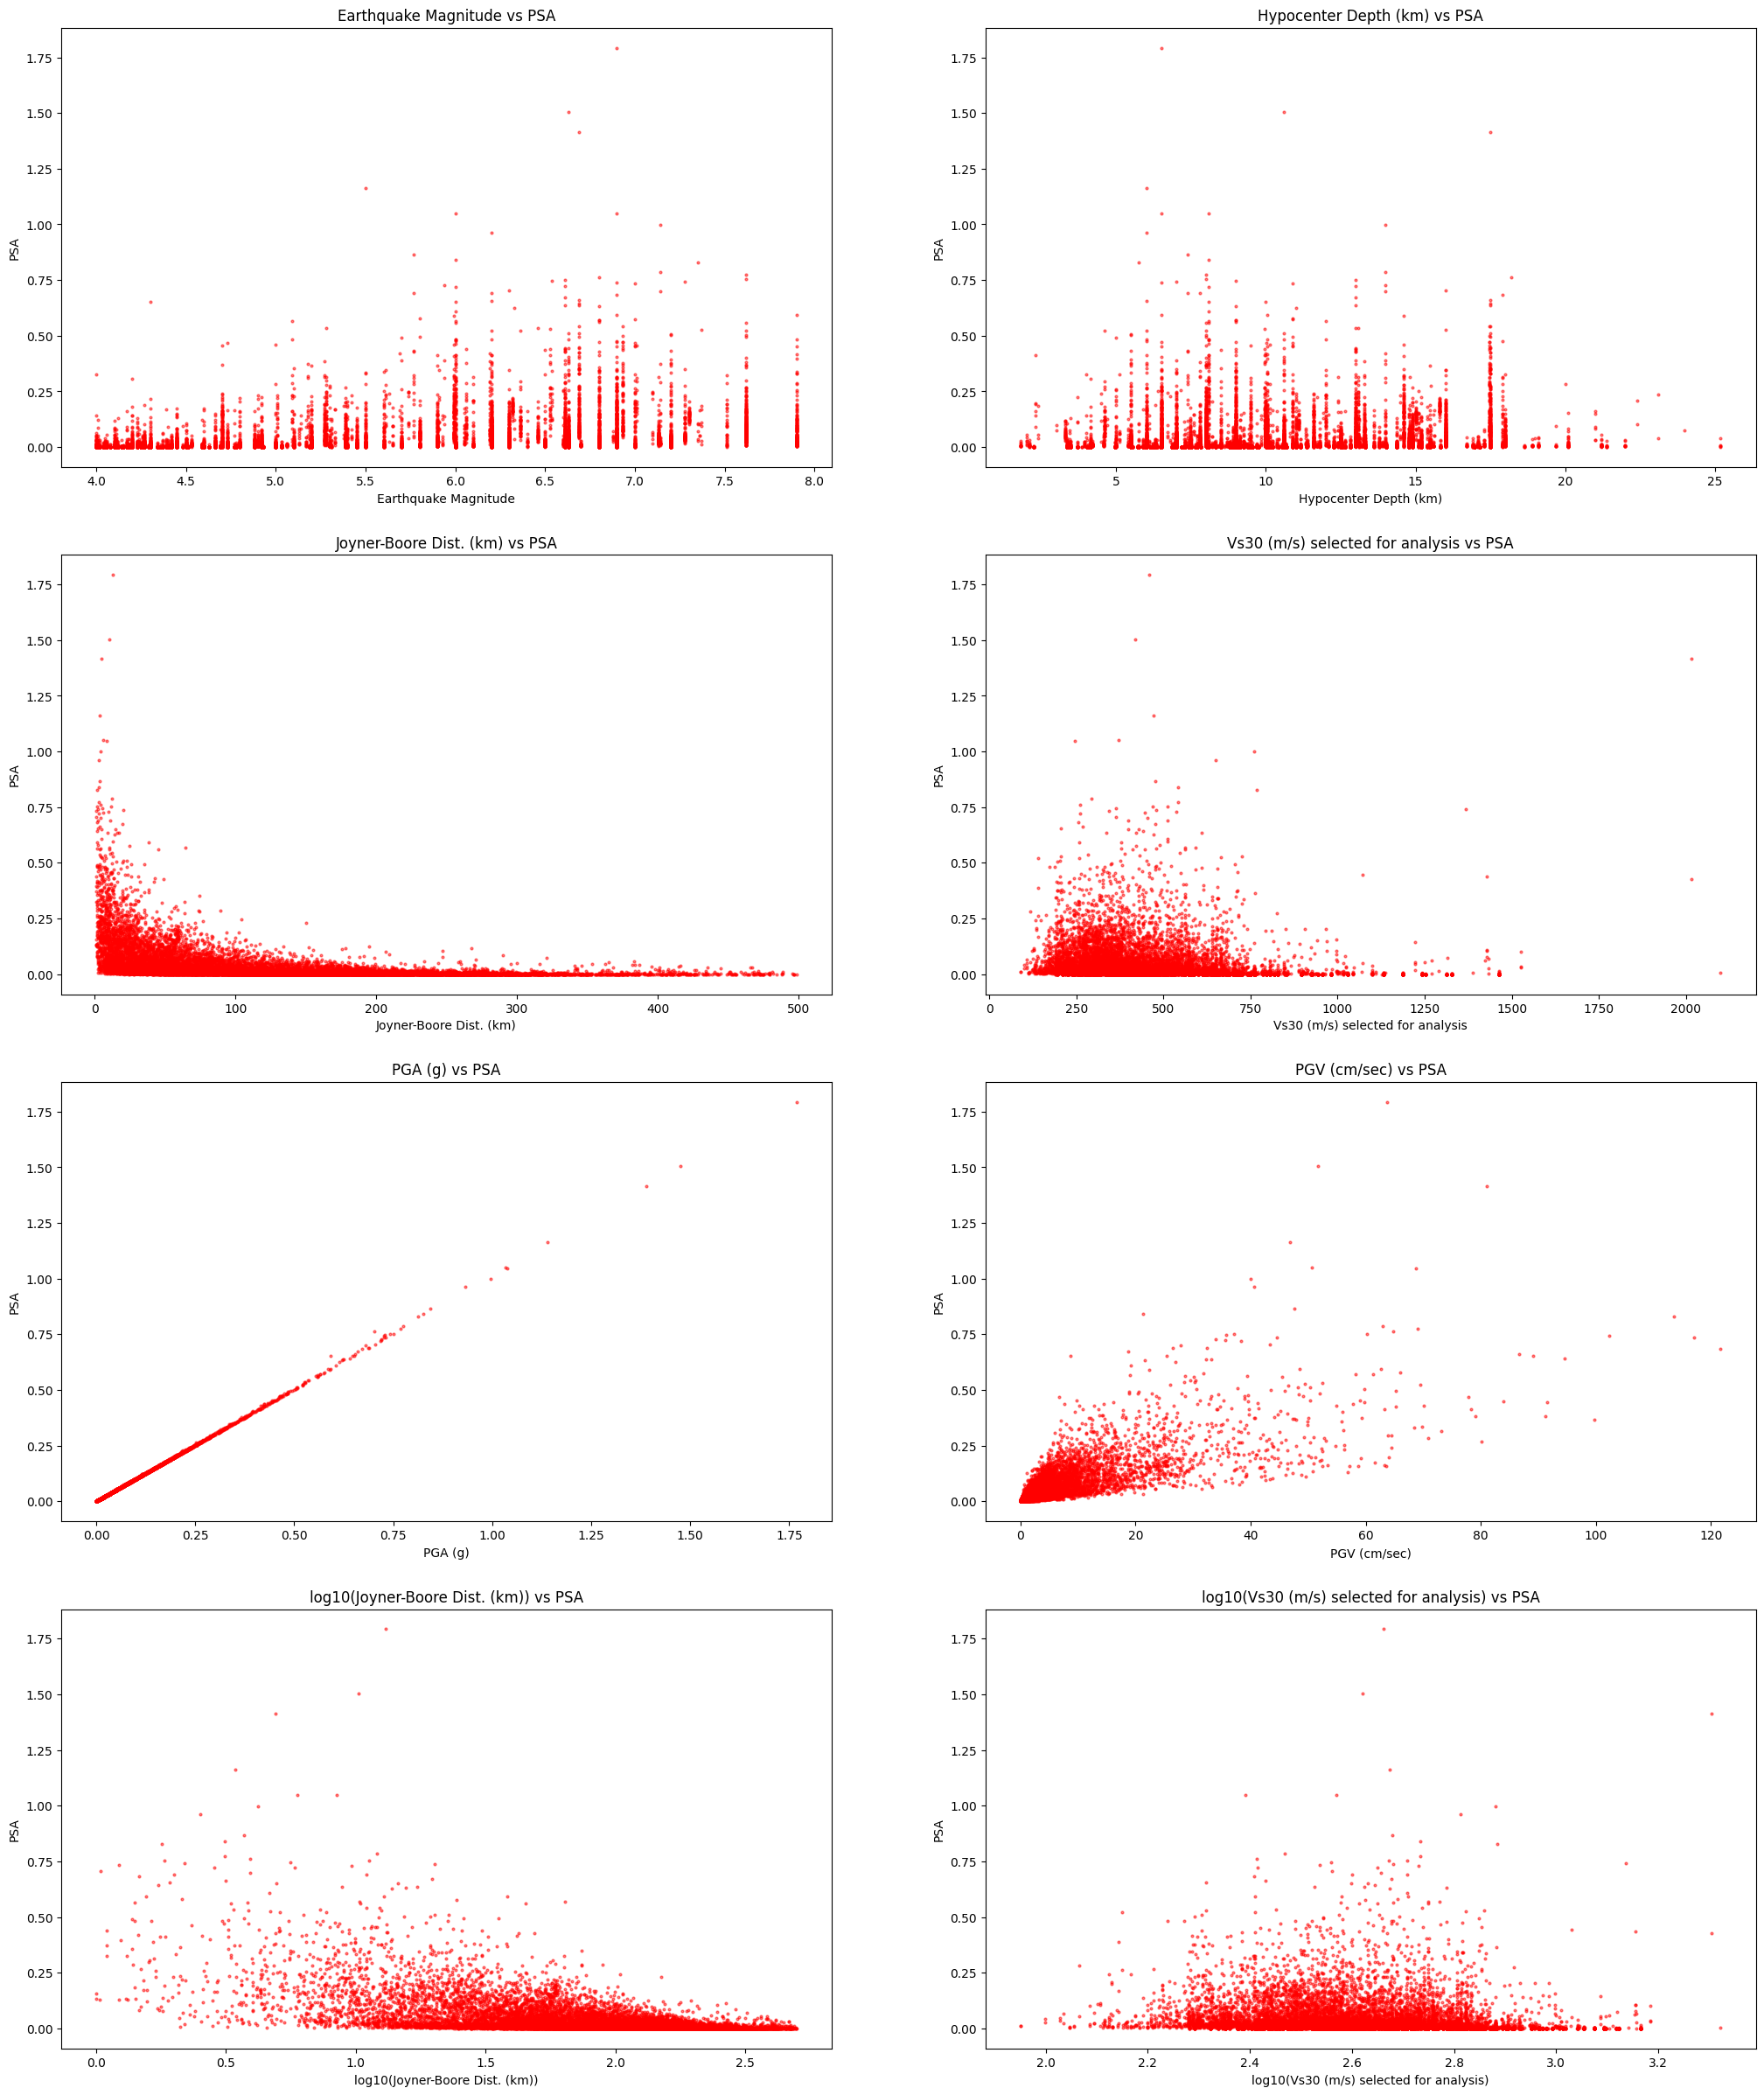

In [2]:
import math as mt
import matplotlib.pyplot as plt
# Plot the scatter plot with colors
Y_val = ModelData.columns.tolist()
Y_val.remove("PSA")
fig, ax = plt.subplots(ncols=2, nrows=mt.ceil(
    len(Y_val)/2), figsize=(25, 7.5*(len(Y_val)/2)))
ax = ax.flatten()

for i in range(len(Y_val)):
    ax[i].scatter(ModelData[Y_val[i]], ModelData["PSA"], c="r", alpha=0.5, s=4)
    ax[i].set_ylabel("PSA")
    ax[i].set_xlabel(Y_val[i])
    ax[i].set_title(f'{Y_val[i]} vs PSA')

plt.show()


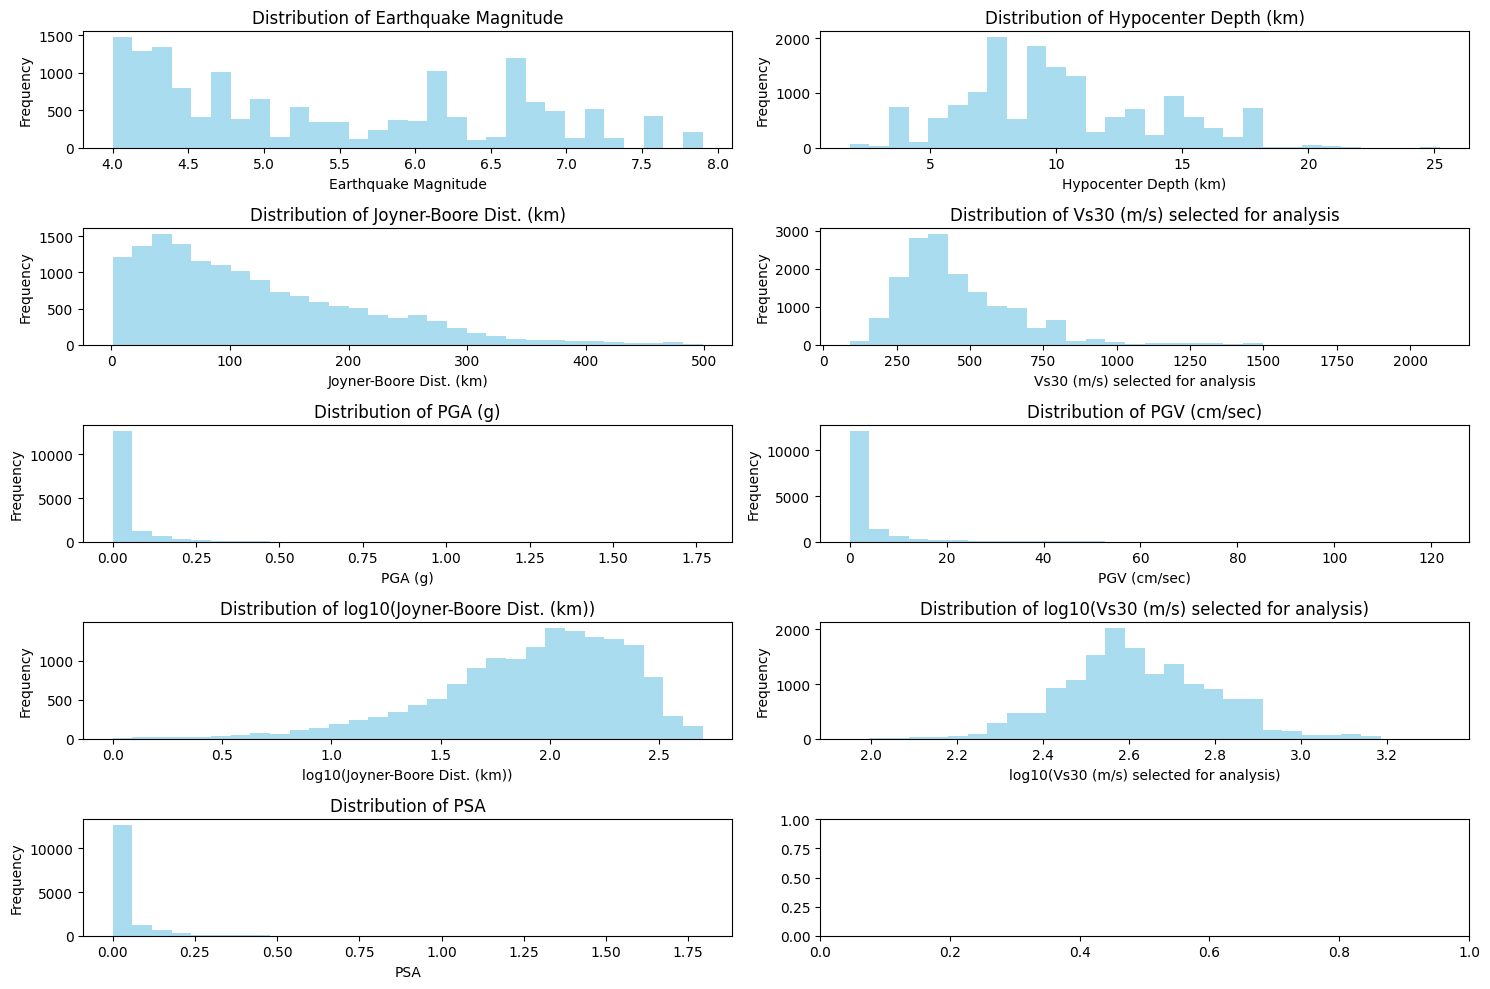

In [8]:


import matplotlib.pyplot as plt

columns = ModelData.columns

# Calculate the number of rows and columns for subplots
num_rows = len(columns) // 2 + len(columns) % 2
num_cols = 2
# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()
# Plot the distributions
for i, column in enumerate(columns):
    axs[i].hist(ModelData[column].dropna(),
                bins=30, color="skyblue", alpha=0.7)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
plt.show()

# Example usage
# Assuming your DataFrame is named 'df'
# If it contains non-numeric columns, you may need to filter them out before using this function



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                576       
                                                                 
 layer_2 (Dense)             (None, 64)                4160      
                                                                 
 layer_3 (Dense)             (None, 64)                4160      
                                                                 
 layer_4 (Dense)             (None, 64)                4160      
                                                                 
 layer_5 (Dense)             (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 17281 (67.50 KB)
Trainable params: 17281

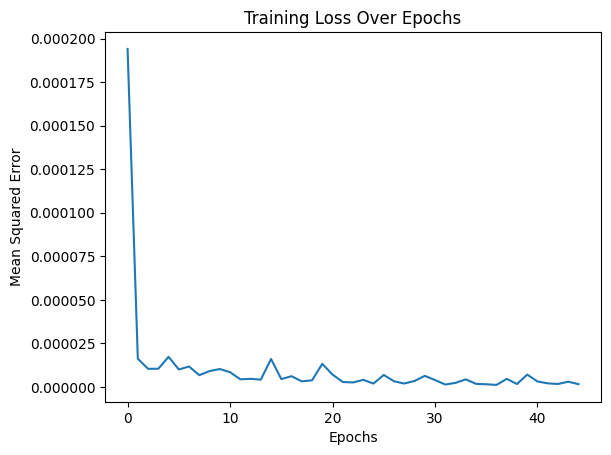

In [3]:
# Import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Assuming ModelData has 7 input features and 1 target
X = ModelData[['Earthquake Magnitude', 'Hypocenter Depth (km)',
               'Joyner-Boore Dist. (km)', 'Vs30 (m/s) selected for analysis',
               'PGA (g)', 'PGV (cm/sec)',
               'log10(Joyner-Boore Dist. (km))',
               'log10(Vs30 (m/s) selected for analysis)']]

y = ModelData["PSA"]

# Normalize input features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = (y-y.min())/(y.max()-y.min())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_normalized, test_size=0.20, random_state=42)

# Build the neural network model
model = models.Sequential()

# Add an input layer with 8 neurons
model.add(layers.Input(shape=(8,), name='input_features'))

# Add 5 hidden layers with 64 neurons each and ReLU activation
for i in range(5):
    model.add(layers.Dense(64, activation='relu', name=f"layer_{i+1}"))

# Add the output layer with one neuron for regression
model.add(layers.Dense(1, activation='linear', name='output'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Print the model summary
model.summary()

# # Train the model
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=500, batch_size=32,
                    validation_split=0.25, callbacks=[early_stopping])
# history = model.fit(X_train, y_train, epochs=100, batch_size=32,
#                     validation_split=0.1765)

# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()


95/95 [==============================] - 0s 1ms/step
Predictions:
Predicted Output: 0.0006583305075764656, Actual Output: 8.290565194624111e-05
Predicted Output: 0.012407263740897179, Actual Output: 0.012374226576511708
Predicted Output: 0.0027080695144832134, Actual Output: 0.0025212791326360558
Predicted Output: 0.008991671726107597, Actual Output: 0.00807632208372238
Predicted Output: 0.0030253923032432795, Actual Output: 0.0027838266135242376
Predicted Output: 0.0006975026335567236, Actual Output: 0.00010149811798874743
Predicted Output: 0.0013788826763629913, Actual Output: 0.0006629247883034813
Predicted Output: 0.0016554574249312282, Actual Output: 0.0006755837258909105
Predicted Output: 0.099663145840168, Actual Output: 0.09892343862801078
Predicted Output: 0.0017104221042245626, Actual Output: 0.001768323294285965
Predicted Output: 0.0018348849844187498, Actual Output: 0.0009842498912936472
Predicted Output: 0.0034925779327750206, Actual Output: 0.004096340952985631
Predicted 

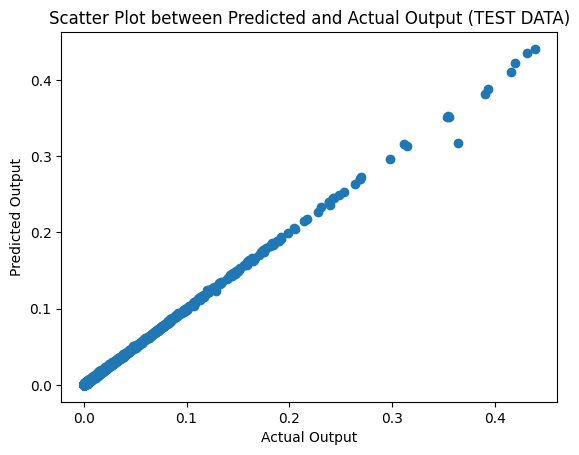

In [15]:
# Make predictions on new data
predictions = model.predict(X_test)
# Print the predictions
print("Predictions:")
for i in range(len(X_test)):
    print(
        f"Predicted Output: {predictions[i][0]}, Actual Output: {y_test.iloc[i]}")

# Scatter plot between predicted and actual output
plt.scatter(y_test, predictions)
plt.title('Scatter Plot between Predicted and Actual Output (TEST DATA)')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

380/380 [==============================] - 1s 1ms/step
Predictions:
Predicted Output: 0.001850917935371399, Actual Output: 0.0009782829030916432
Predicted Output: 0.09757896512746811, Actual Output: 0.0967374018287719
Predicted Output: 0.008522982709109783, Actual Output: 0.008426534101559632
Predicted Output: 0.0023091230541467667, Actual Output: 0.0014355661110956976
Predicted Output: 0.0030167275108397007, Actual Output: 0.0024332799982177146
Predicted Output: 0.0025850245729088783, Actual Output: 0.0035132490965355825
Predicted Output: 0.02296466939151287, Actual Output: 0.021693881420613847
Predicted Output: 0.00719269597902894, Actual Output: 0.00681042832497945
Predicted Output: 0.011812644079327583, Actual Output: 0.011356492607478294
Predicted Output: 0.0006716509815305471, Actual Output: 0.00014997571466166505
Predicted Output: 0.024606384336948395, Actual Output: 0.025749202748181512
Predicted Output: 0.0003996710292994976, Actual Output: 6.991769351402839e-05
Predicted Outp

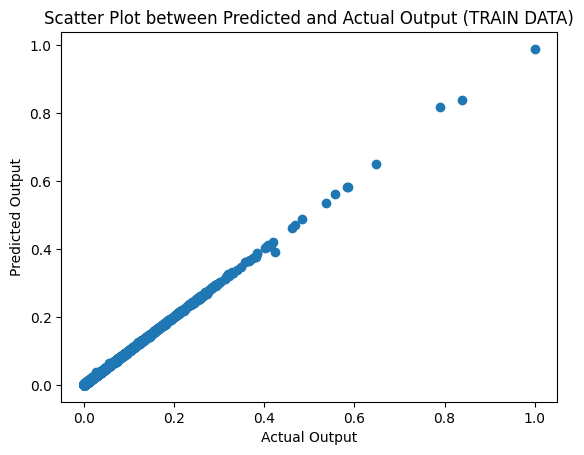

In [22]:
# Make predictions on new data
predictions = model.predict(X_train)
# Print the predictions
print("Predictions:")
for i in range(len(X_train)):
    print(
        f"Predicted Output: {predictions[i][0]}, Actual Output: {y_train.iloc[i]}")

# Scatter plot between predicted and actual output
plt.scatter(y_train, predictions)
plt.title('Scatter Plot between Predicted and Actual Output (TRAIN DATA)')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inverse transform the normalized predictions to the original scale
predictions_original_scale = predictions * (y.max() - y.min()) + y.min()

# Inverse transform the normalized y_test to the original scale
y_test_original_scale = y_test * (y.max() - y.min()) + y.min()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original_scale, predictions_original_scale)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original_scale, predictions_original_scale)

# Flatten the arrays to ensure they have the same shape
y_test_flat = y_test_original_scale.values.flatten()
predictions_flat = predictions_original_scale.flatten()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_flat - predictions_flat) / y_test_flat)) * 100

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error (MSE): 4.088083707939562e-06
Mean Absolute Error (MAE): 0.001038632224102999
Mean Absolute Percentage Error (MAPE): 255.02619907624702%


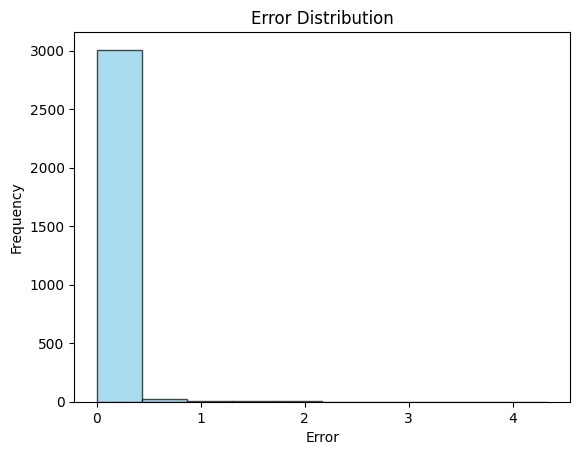

In [26]:
Error = np.abs((y_test_flat - predictions_flat) / y_test_flat)/100

import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(Error, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [6]:
from tensorflow.keras.models import save_model

# ... (previous code)

# Assuming you have trained the model and want to save it
model.save('Model1_20_20_60.h5')

# Alternatively, you can specify a directory to save the model
model.save('C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/ANN Model/Model/Model1_20_20_60.h5')


c:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('Model1_20_20_60.h5')

# Now you can use the loaded_model for predictions or further training
